In [1]:
import numpy as np
import pandas as pd
from matplotlib.patches import Patch
import itertools
import pickle
from matplotlib import pyplot as plt
import datetime
from scipy import optimize
import SEIR_full as mdl


In [2]:
plt.style.use('dean_style.conf')

# Examine

In [13]:
res = mdl.run_model(beta_home = 0., beta_j=np.array([0.0]*9),eps=mdl.eps['Scenario1'],f=mdl.f0_full['Scenario1'],days_in_season=400, alpha=1,
                )

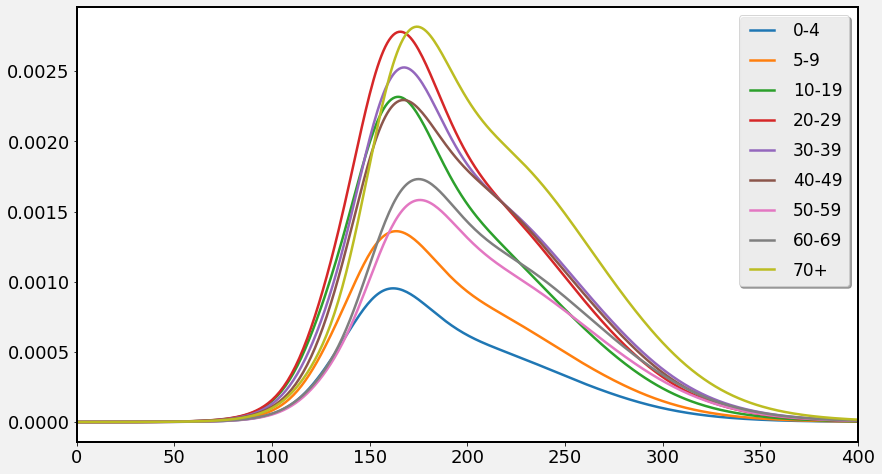

(<Figure size 1008x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2384c2c0a58>)

In [14]:
mdl.plot_I_by_age(res)

In [15]:
res['new_Is'].sum()

0.14368366403955943

# Model calibration

In [3]:
# import data
data = pd.read_csv('../Data/data_IL_age.csv')
data.head()

,0-4,5-9,10-19,20-29,30-39,40-49,50-59,60-69,70+
0,4.378280e-09,4.378280e-09,2.189140e-08,5.253940e-08,3.283710e-08,2.845880e-08,3.064800e-08,2.408060e-08,1.970230e-08
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


## Calibration with initial I distributed based on population

minimized value: -24.62905861447198
fitted parameters: Beta=[0.         0.00903881 0.05623177 0.05825977 0.227204  ]
num of sampling the target function: 117


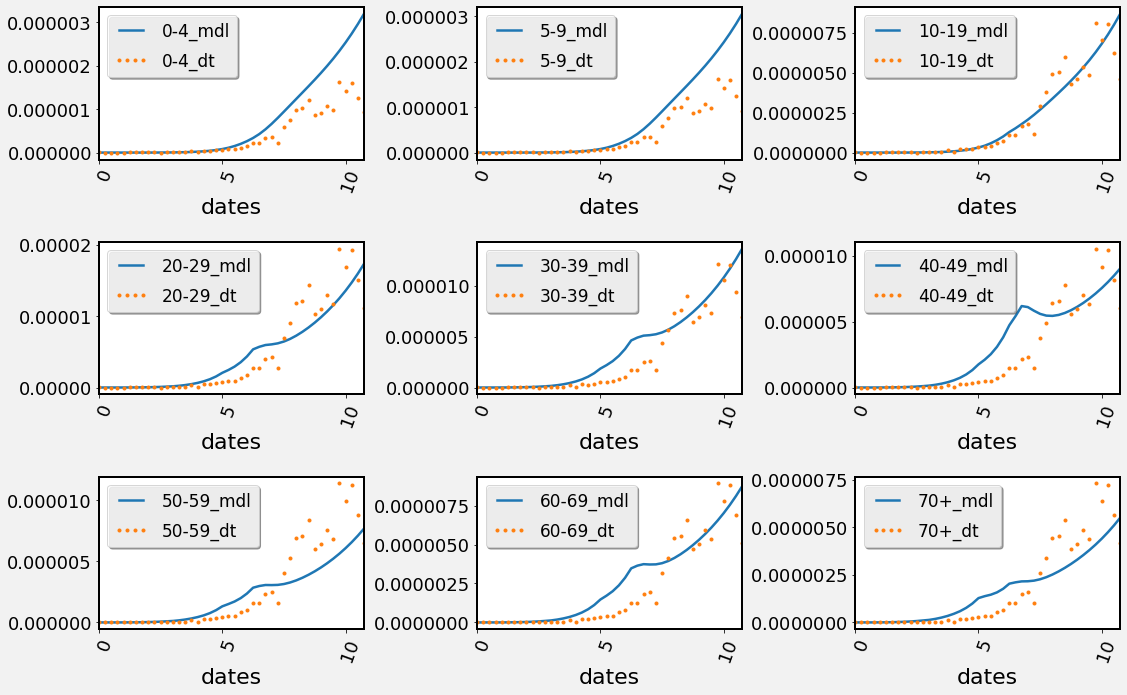

In [6]:
days_in_season=400
alpha=1

# Model Fitting
p0=(0.0568896,0.05063072,0.09070173,0.11419741,0.2) # initial guess
bnds = ((0,0.7),(0,0.7),(0,0.15),(0,0.22),(0,0.25))# boundries for variables
# errorfunc(tpl,data,f,season_length, eps, alpha)
res_fit= optimize.minimize(mdl.errorfunc,p0,bounds=bnds,method='TNC',args=(data.values,mdl.f0_full['Scenario3'],
                                                                           days_in_season,mdl.eps['Scenario3'],alpha)
                           ,options={'maxiter':1000})

fitted_params = res_fit.x

# run the fitted model:
fitted_beta = np.array([fitted_params[0], fitted_params[0], fitted_params[1], fitted_params[2], fitted_params[2],\
                        fitted_params[3], fitted_params[3], fitted_params[4], fitted_params[4]])
# fitted_beta_home = fitted_params[5]
                        
res_mdl = mdl.run_model(beta_home=0.38/9., beta_j=fitted_beta, eps=mdl.eps['Scenario3'], f=mdl.f0_full['Scenario3'], alpha=alpha, days_in_season=days_in_season)

# plotting the data and model
mdl.print_stat_fit(res_fit)
mdl.plot_calibrated_model(data=data.values, mdl_data = res_mdl['new_Is'],date_list = data.index.values, 
                      season_length=days_in_season )